Context
Using Watson Analytics, you can predict behavior to retain your customers. You can analyze all relevant customer data and develop focused customer retention programs.

Inspiration
Understand customer demographics and buying behavior. Use predictive analytics to analyze the most profitable customers and how they interact. Take targeted actions to increase profitable customer response, retention, and growth.

Source
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [112]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns               # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from subprocess import check_output

import warnings                                            # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore')

In [114]:
def annot_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points')             
def annot_plot_num(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))



In [115]:
import os
print(os.listdir("../input"))

FileNotFoundError: [Errno 2] No such file or directory: '../input'

In [116]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [117]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [118]:
df.shape #9134 rows and 24 columns

(9134, 24)

In [119]:
df.Response = df.Response.apply(lambda X : 0 if X == 'No' else 1)

In [120]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Part 2: Exploratory Analysis 

In [121]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null int64
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9

In [122]:
df.isnull().sum()#counting NaaN values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [123]:
df.describe

<bound method NDFrame.describe of      Customer       State  Customer Lifetime Value  Response  Coverage  \
0     BU79786  Washington              2763.519279         0     Basic   
1     QZ44356     Arizona              6979.535903         0  Extended   
2     AI49188      Nevada             12887.431650         0   Premium   
3     WW63253  California              7645.861827         0     Basic   
4     HB64268  Washington              2813.692575         0     Basic   
5     OC83172      Oregon              8256.297800         1     Basic   
6     XZ87318      Oregon              5380.898636         1     Basic   
7     CF85061     Arizona              7216.100311         0   Premium   
8     DY87989      Oregon             24127.504020         1     Basic   
9     BQ94931      Oregon              7388.178085         0  Extended   
10    SX51350  California              4738.992022         0     Basic   
11    VQ65197  California              8197.197078         0     Basic   
12  

# 2.1 Response Rate:¶

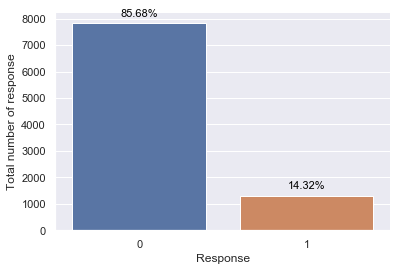

In [124]:
ax = sns.countplot('Response', data = df)
plt.ylabel('Total number of response')
annot_plot(ax, 0.08, 1)
plt.show()

The above barchart shows that 85.65% of customers have not responsed to marketing calls and 14.32% did respond. 

demographics

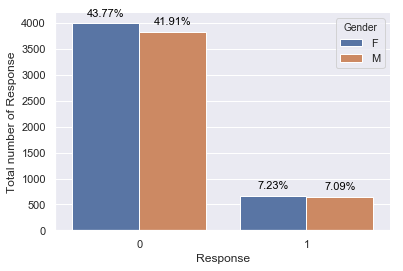

In [125]:
ax = sns.countplot('Response',hue = 'Gender', data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08, 1)
plt.show()

Notice how the reatio of male and female for responding to a markering call is almost the same.

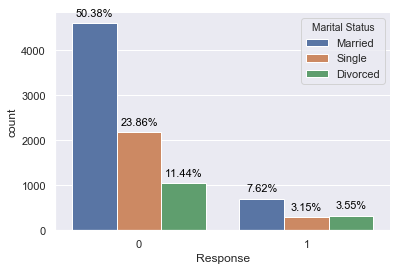

In [126]:
ax = sns.countplot('Response', hue = df['Marital Status'], data = df)
annot_plot(ax, 0.08, 1)
plt.show()

Of the 14% of customers that responded ot marketing, 8% were from the married category

# 2.1.2 Response rate by renewal offer


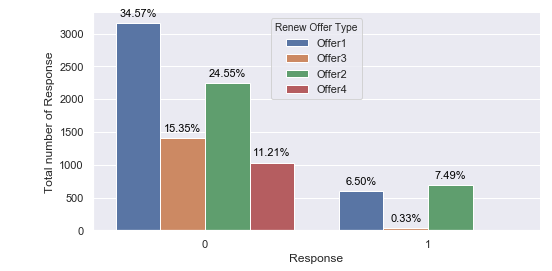

In [127]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response',hue = 'Renew Offer Type' ,
data = df)
plt.ylabel('Total number of Response')
annot_plot(ax,0.08,1)
plt.show()

For offer 1 and offer 2 customers have responded to marketing calls, but for offer 3 and offer 4 almost nobody responded.

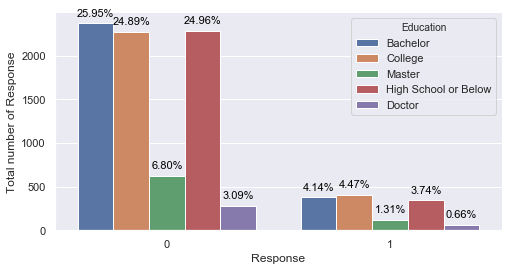

In [128]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'Education', data = df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

Above, notice that the customers with Doctor and master degrees are less than the rest in responding to marketing calls. Maybe they are too busy or are just not interested. Or maybe they are older than the others and age might play a role. 

# 2.1.3 Response rate by Sales Channel

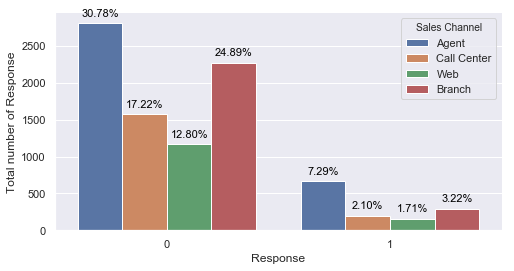

In [129]:
plt.figure(figsize=(8,4))
ax = sns.countplot('Response', hue = 'Sales Channel', data =df)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08, 1)
plt.show()


You can run response reates for most of the columns but I'm most curious about sales.

# 3 Regression Analysis with Continuous Variables Only

In [130]:
import statsmodels.api as sm

In [131]:
continuous_var_df = df.select_dtypes(include=['int64', 'float'])
continuous_var_df.nunique()

Customer Lifetime Value          8041
Response                            2
Income                           5694
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Total Claim Amount               5106
dtype: int64

In [132]:
continuous_var_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [133]:
continuous_var_reg = sm.Logit(continuous_var_df['Response'], continuous_var_df.drop('Response', axis = 1))

In [134]:
continuous_var_reg.fit().summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                -0.02546
Time:                        12:46:40   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

The following pvalues for the corresponding input variables seem to have significant relationships with the output(target) variable 'Response':  Income, Monthly Premium Auto, Moths Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies.

The coefficient shows that they are also all negatively correlated to the Response variable. 

Refreshment on what p-values are

P-values evaluate how well the sample data support the devil's advocate argument that the null hypothesis is true. It measures how compatible your data is wit hthe null hypothesis. Hoe likely is the effect observed in your sample data id the null hypothesis is true?

# High P values: your data are likely with a true null

# Low P values: your data are unlikely with a true null

A low p val suggests that your sample provides enough evidence that you can regect the null hypothesis for the entire population.

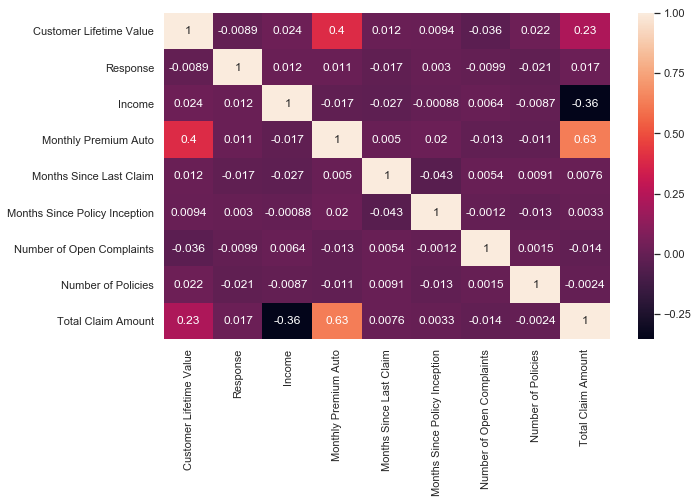

In [135]:
plt.figure(figsize=(10,6))
sns.heatmap(continuous_var_df.corr(), annot = True)
plt.show()

# 4.Regression Analysis with Categorical Variables

In [136]:
categorical_df = df.select_dtypes(include='object')
cat_df = categorical_df.drop(['Customer', 'Effective To Date'], axis = 1)

In [137]:
cat_df.nunique()#cat stands for categorical

State               5
Coverage            3
Education           5
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy Type         3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
Vehicle Size        3
dtype: int64

# Conversion of Categorical data

In [138]:
cat_df.columns

Index(['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [139]:
cols = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

In [140]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df[cols]:
    cat_df[col] = lb.fit_transform(cat_df[col])

In [141]:
cat_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,1,0,1,1,0,2,0,0,5,1
1,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,1,1,0,2,1,3,0,0,0,1


In [142]:
categorical_train = sm.Logit(continuous_var_df.Response, cat_df)
categorical_train.fit().summary()

Optimization terminated successfully.
         Current function value: 0.387557
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9121
Method:                           MLE   Df Model:                           12
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                 0.05642
Time:                        12:46:54   Log-Likelihood:                -3539.9
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                 4.224e-83
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
State               -0.0256      0.023     -1.122      0.262      -0.070       0.019
Coverage            -0.0639      0.046     -1.390      0.164      -0.154       0.026
Education            0.0088      0.022      0.409      0.683      -0.033       0.051
EmploymentStatus    -0.0459      0.024     -1.951      0.051      -0.092       0.000
Gender               0.0466      0.060      0.774      0.439      -0.071       0.165
Location Code       -0.0477      0.047     -1.014      0.311      -0.140       0.045
Marital Status      -0.4643      0.047     -9.816      0.000      -0.557      -0.372
Policy Type          0.1736      0.132      1.311      0.190      -0.086       0.433
Policy              -0.0751      0.037     -2.033      0.042      -0.147      -0.003
Renew Offer Type    -0.5681      0.037    -15.226      0.000      -0.641      -0.495
Sales Channel       -0.2150      0.030     -7.148      0.000      -0.274      -0.156
Vehicle Class        0.0201      0.015      1.381      0.167      -0.008       0.049
Vehicle Size        -0.3355      0.052     -6.398      0.000      -0.438      -0.233
====================================================================================
"""

Looking at the p-value, 'Marital Status', 'Renew Offer Type', 'Sales channel', 'Vehicle size', 'policy' variables are significant at 0.05 sig level, and all of them have a negative relationship with the Response varicable(output variable).

# 5. Regression Analysis with bith Continuous and Categorical Variables

In [143]:
continuous_var_df.reset_index(drop = True, inplace=True)

cat_df.reset_index(drop = True, inplace=True)

In [144]:
all_data_df = pd.concat([continuous_var_df, cat_df], axis =1)

In [145]:
all_data_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State,...,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,2763.519279,0,56274,69,32,5,0,1,384.811147,4,...,1,0,1,1,0,2,0,0,5,1
1,6979.535903,0,0,94,13,42,0,8,1131.464935,0,...,4,0,1,2,1,5,2,0,0,1
2,12887.431650,0,48767,108,18,38,0,2,566.472247,2,...,1,0,1,1,1,5,0,0,5,1
3,7645.861827,0,0,106,18,65,0,7,529.881344,1,...,4,1,1,1,0,1,0,2,3,1
4,2813.692575,0,43836,73,12,44,0,1,138.130879,4,...,1,1,0,2,1,3,0,0,0,1


By looking at the p-value of 'Customer lifetime value','Income', 'Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception','Number of Policies','Total claim amount','Marital Status','Renew offer type','Sales Channel','Vehicle size', these input variables seems to have significant relationships with the output(target) variable 'Response'. By looking at the coeff,they are all negatively correlated to the Response variable

Conclusion being that hte higher the customer lifetime value is, the less likelu that the customer will respond to marketing calls.

# 6. Regression Analysis excluding Non-sig variables

In [146]:
all_data_df.columns

Index(['Customer Lifetime Value', 'Response', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
       'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [147]:
significant_cols = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                    'Months Since Policy Inception','Number of Policies','Total Claim Amount','Marital Status',
                    'Renew Offer Type','Sales Channel','Vehicle Size']
trainData = sm.Logit(all_data_df.Response, all_data_df[significant_cols])
trainData.fit().summary()

Optimization terminated successfully.
         Current function value: 0.385476
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9123
Method:                           MLE   Df Model:                           10
Date:                Thu, 03 Oct 2019   Pseudo R-squ.:                 0.06149
Time:                        12:46:57   Log-Likelihood:                -3520.9
converged:                       True   LL-Null:                       -3751.6
                                        LLR p-value:                 7.814e-93
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -1.129e-05   5.09e-06     -2.217      0.027   -2.13e-05   -1.31e-06
Income                         3.549e-06   1.11e-06      3.192      0.001    1.37e-06    5.73e-06
Monthly Premium Auto             -0.0033      0.001     -2.762      0.006      -0.006      -0.001
Months Since Last Claim          -0.0062      0.003     -2.102      0.036      -0.012      -0.000
Months Since Policy Inception    -0.0023      0.001     -2.238      0.025      -0.004      -0.000
Number of Policies               -0.0414      0.013     -3.226      0.001      -0.067      -0.016
Total Claim Amount                0.0006      0.000      4.148      0.000       0.000       0.001
Marital Status                   -0.4794      0.045    -10.664      0.000      -0.567      -0.391
Renew Offer Type                 -0.5793      0.038    -15.268      0.000      -0.654      -0.505
Sales Channel                    -0.1981      0.030     -6.539      0.000      -0.257      -0.139
Vehicle Size                     -0.3031      0.053     -5.690      0.000      -0.407      -0.199
=================================================================================================
"""

## 7. Classification 
In machine learning and statistics, classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation

In [148]:
y = all_data_df.Response
x = all_data_df.drop('Response', axis = 1)

In [149]:
from sklearn.model_selection import train_test_split, cross_validate
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =42)

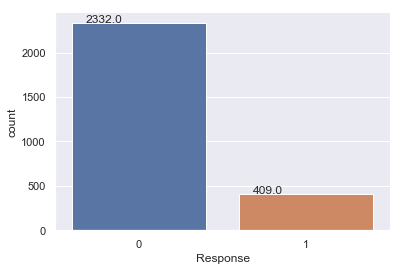

In [150]:
ax = sns.countplot(y_test)
annot_plot_num(ax,0.08,1)

## SVC Classification
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

Effective in high dimensional spaces.
Still effective in cases where number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
The disadvantages of support vector machines include:

If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [152]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred, y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))
cross_val_score_svc = cross_validate(svc, X_train, y_train, cv =5)
print('Cross validation train_score', cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2332   43]
 [   0  366]]
accuracy_score: 0.9843122947829259
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2375
           1       0.89      1.00      0.94       366

   micro avg       0.98      0.98      0.98      2741
   macro avg       0.95      0.99      0.97      2741
weighted avg       0.99      0.98      0.98      2741

Cross validation train_score 1.0
Cross validation test_score 0.9776321678484378


## 7.2 RandomForestClassifier 

In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred, y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train, y_train, cv = 5)

print('Cross validation train_score', cross_val_score_rfc['train_score'].mean())
print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2324   26]
 [   8  383]]
Accuracy score: 0.9875957679678949
Cross validation train_score 0.9991396778929079
Cross validation test_score 0.9782559421729118


## Feature Importance

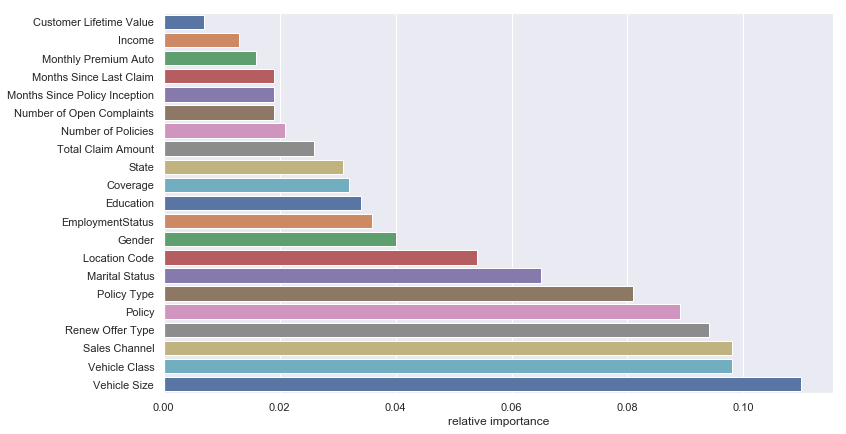

In [173]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=x.columns)
feature_imp.sort()

plt.figure(figsize=(12,7))
sns.barplot(x=ser_rank.values, y = ser_rank.index,palette='deep')
plt.xlabel('relative importance')
plt.show()